In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/sample_data/Zoo.csv')
print("Dataset loaded:", df.shape)
print(df['type'].value_counts().sort_index())
print("\nNo missing values found")

Dataset loaded: (101, 18)
type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64

No missing values found


In [3]:
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (80, 16), Test: (21, 16)


In [5]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [6]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.952

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



In [7]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution')

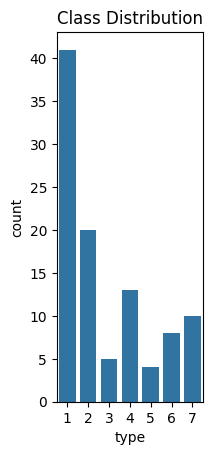

In [8]:
plt.subplot(1,3,1)
sns.countplot(x='type', data=df)
plt.title('Class Distribution')

Text(0.5, 1.0, 'PCA 2D View')

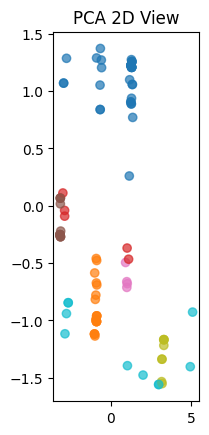

In [9]:
plt.subplot(1,3,2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', alpha=0.7)
plt.title('PCA 2D View')

Text(0.5, 23.52222222222222, 'Predicted')

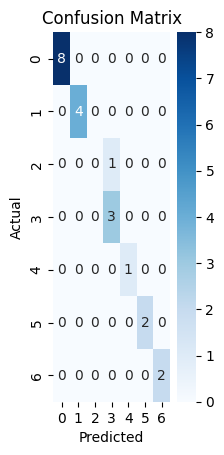

In [10]:
plt.subplot(1,3,3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
print("\nKNN Hyperparameters:")
print("- K (neighbors): 5")
print("- Distance metric: Euclidean")
print("- Weights: uniform")


KNN Hyperparameters:
- K (neighbors): 5
- Distance metric: Euclidean
- Weights: uniform


In [13]:
print("\nCommon KNN distance metrics:")
print("- Euclidean (default)")
print("- Manhattan")
print("- Minkowski")
print("- Hamming (good for binary data)")


Common KNN distance metrics:
- Euclidean (default)
- Manhattan
- Minkowski
- Hamming (good for binary data)
